In [1]:
import numpy as np
import networkx as nx
from scipy.stats import entropy
import matplotlib.pyplot as plt
import random
import string

%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim

import entropy_estimators as ee

In [ ]:
from func.EI_calculation import tpm_ei
from func.p_calculation import calculate_or_p
from func.p_calculation import calculate_xor_p
from func.p_calculation import noise_modify_p

In [2]:
%run EI_calculation.ipynb

In [3]:
%run p_calculation.ipynb

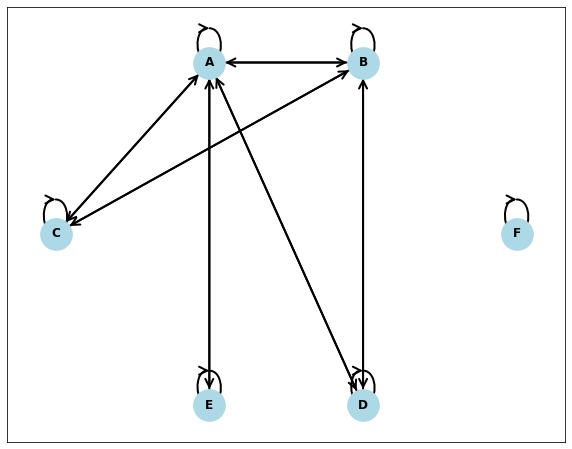

In [12]:
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'D'), ('D', 'A'), ('A', 'E'), ('E', 'A'), 
                  ('A', 'A'), ('B', 'C'), ('C', 'B'), ('B', 'D'), ('D', 'B'), ('B', 'B'),
                  ('C', 'C'), ('D', 'D'), ('E', 'E'), ('F', 'F')])
pos = {'A': (2, 3), 'B': (3, 3), 'C': (1, 2), 'D': (3, 1), 'E': (2, 1), 'F': (4, 2)}
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', font_weight='bold', arrows=True, 
                 labels={node: node for node in G.nodes()}, node_size=1000, width=2, arrowstyle='->', arrowsize=20)
plt.show()

In [4]:
def same_xor_ei(degree):
    global Col
    ei_results = {}  # 用于存储结果的字典
    print(ei_results)
    total_combinations = 2 ** (degree - 1) # 计算组合总数
    print(total_combinations)
    
    for m in range(total_combinations):
        print("m =", m)
        binary_str = f'{m:0{degree}b}'  # 生成相应长度的二进制字符串
        print(binary_str)
        Col = [binary_str, '1' + binary_str[1:]]  # 创建 'Col' 变量
        print(Col)
        
        A = np.empty((2, 2))  # 初始化一个 2x2 的空数组
        
        params = tuple(range(degree))  # 根据 bit_length 动态生成参数列表
        print(params)
        
        for i in range(A.shape[0]):
            A[i] = calculate_xor_p(i, *params)  # 动态传入参数
            print(A[i])
        print(A)
        
        ei = tpm_ei(A, log_base=2)
        print(ei)
        ei_results[binary_str] = ei
        print(ei_results)
    
    return ei_results

In [5]:
def calculate_average(ei_results):
    total_sum = sum(ei_results.values())  # 计算所有值的总和
    count = len(ei_results)  # 计算字典中键值对的数量
    average = total_sum / count if count != 0 else 0  # 计算平均数，避免除以零
    return average

# A

In [6]:
A_bit_length = 5
A_ei_results = same_xor_ei(A_bit_length) 

{}
16
m = 0
00000
['00000', '10000']
(0, 1, 2, 3, 4)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'00000': 1.0}
m = 1
00001
['00001', '10001']
(0, 1, 2, 3, 4)
[0. 1.]
[1. 0.]
[[0. 1.]
 [1. 0.]]
1.0
{'00000': 1.0, '00001': 1.0}
m = 2
00010
['00010', '10010']
(0, 1, 2, 3, 4)
[0. 1.]
[1. 0.]
[[0. 1.]
 [1. 0.]]
1.0
{'00000': 1.0, '00001': 1.0, '00010': 1.0}
m = 3
00011
['00011', '10011']
(0, 1, 2, 3, 4)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'00000': 1.0, '00001': 1.0, '00010': 1.0, '00011': 1.0}
m = 4
00100
['00100', '10100']
(0, 1, 2, 3, 4)
[0. 1.]
[1. 0.]
[[0. 1.]
 [1. 0.]]
1.0
{'00000': 1.0, '00001': 1.0, '00010': 1.0, '00011': 1.0, '00100': 1.0}
m = 5
00101
['00101', '10101']
(0, 1, 2, 3, 4)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'00000': 1.0, '00001': 1.0, '00010': 1.0, '00011': 1.0, '00100': 1.0, '00101': 1.0}
m = 6
00110
['00110', '10110']
(0, 1, 2, 3, 4)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'00000': 1.0, '00001': 1.0, '00010': 1.0, '00011': 1.0, '00100': 1.0, '00101': 1.0, '00110'

In [7]:
A_average_ei = calculate_average(A_ei_results)
print(f"A动力学异质: {A_average_ei}")

A动力学异质: 1.0


# B

In [8]:
B_bit_length = 4
B_ei_results = same_xor_ei(B_bit_length) 

{}
8
m = 0
0000
['0000', '1000']
(0, 1, 2, 3)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'0000': 1.0}
m = 1
0001
['0001', '1001']
(0, 1, 2, 3)
[0. 1.]
[1. 0.]
[[0. 1.]
 [1. 0.]]
1.0
{'0000': 1.0, '0001': 1.0}
m = 2
0010
['0010', '1010']
(0, 1, 2, 3)
[0. 1.]
[1. 0.]
[[0. 1.]
 [1. 0.]]
1.0
{'0000': 1.0, '0001': 1.0, '0010': 1.0}
m = 3
0011
['0011', '1011']
(0, 1, 2, 3)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'0000': 1.0, '0001': 1.0, '0010': 1.0, '0011': 1.0}
m = 4
0100
['0100', '1100']
(0, 1, 2, 3)
[0. 1.]
[1. 0.]
[[0. 1.]
 [1. 0.]]
1.0
{'0000': 1.0, '0001': 1.0, '0010': 1.0, '0011': 1.0, '0100': 1.0}
m = 5
0101
['0101', '1101']
(0, 1, 2, 3)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'0000': 1.0, '0001': 1.0, '0010': 1.0, '0011': 1.0, '0100': 1.0, '0101': 1.0}
m = 6
0110
['0110', '1110']
(0, 1, 2, 3)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'0000': 1.0, '0001': 1.0, '0010': 1.0, '0011': 1.0, '0100': 1.0, '0101': 1.0, '0110': 1.0}
m = 7
0111
['0111', '1111']
(0, 1, 2, 3)
[0. 1.]
[1. 0.]
[[0. 1.

In [9]:
B_average_ei = calculate_average(B_ei_results)
print(f"B动力学异质: {B_average_ei}")

B动力学异质: 1.0


# C and D

In [10]:
C_bit_length = 3
C_ei_results = same_xor_ei(C_bit_length) 

{}
4
m = 0
000
['000', '100']
(0, 1, 2)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'000': 1.0}
m = 1
001
['001', '101']
(0, 1, 2)
[0. 1.]
[1. 0.]
[[0. 1.]
 [1. 0.]]
1.0
{'000': 1.0, '001': 1.0}
m = 2
010
['010', '110']
(0, 1, 2)
[0. 1.]
[1. 0.]
[[0. 1.]
 [1. 0.]]
1.0
{'000': 1.0, '001': 1.0, '010': 1.0}
m = 3
011
['011', '111']
(0, 1, 2)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'000': 1.0, '001': 1.0, '010': 1.0, '011': 1.0}


In [11]:
C_average_ei = calculate_average(C_ei_results)
print(f"C动力学异质: {C_average_ei}")

C动力学异质: 1.0


# E

In [12]:
E_bit_length = 2
E_ei_results = same_xor_ei(E_bit_length) 

{}
2
m = 0
00
['00', '10']
(0, 1)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'00': 1.0}
m = 1
01
['01', '11']
(0, 1)
[0. 1.]
[1. 0.]
[[0. 1.]
 [1. 0.]]
1.0
{'00': 1.0, '01': 1.0}


In [13]:
E_average_ei = calculate_average(E_ei_results)
print(f"E动力学异质: {E_average_ei}")

E动力学异质: 1.0


# F

In [14]:
F_bit_length = 1
F_ei_results = same_xor_ei(F_bit_length) 

{}
1
m = 0
0
['0', '1']
(0,)
[1. 0.]
[0. 1.]
[[1. 0.]
 [0. 1.]]
1.0
{'0': 1.0}


In [15]:
F_average_ei = calculate_average(F_ei_results)
print(f"F动力学异质: {F_average_ei}")

F动力学异质: 1.0
